## 1. Import libraries


In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
import warnings





In [3]:
# switch off the warnings
warnings.filterwarnings("ignore")

## 2. Read data

In [4]:
df_holidays = pd.read_csv("./data/holidays_events.csv", header = 0)
df_oil = pd.read_csv("./data/oil.csv", header = 0)
df_stores = pd.read_csv("./data/stores.csv", header = 0)
df_trans = pd.read_csv("./data/transactions.csv", header = 0)
df_train = pd.read_csv("./data/train.csv", header  = 0)
df_test = pd.read_csv("./data/test.csv", header = 0)

Also, we need to convert all "data" columns to datetime Pandas format.

In [5]:
df_holidays['date'] = pd.to_datetime(df_holidays.date, format = "%Y-%m-%d")
df_oil['date'] = pd.to_datetime(df_oil.date, format = "%Y-%m-%d")
df_trans['date'] = pd.to_datetime(df_trans.date, format = "%Y-%m-%d")
df_train['date'] = pd.to_datetime(df_train.date, format = "%Y-%m-%d")
df_test['date'] = pd.to_datetime(df_test.date, format = "%Y-%m-%d")

After that, we can look and check our different dataframes:

Here we can see **df_holidays**:

In [6]:
df_holidays.head(10)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


Here we can see **df_oil**:


In [7]:
df_oil.head(3)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97


Here we can see **df_stores**:

In [8]:
df_stores.head(10)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [9]:
df_trans.head(3)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358


In [10]:
df_train.head(10)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0


Here we can see **df_test**：

In [11]:
df_test.head(5)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


## 3. Visulization data

One of the biggest parts of the notebook. Here we can look through some varibles and see some dependencies. Firstly, let's check the **dependency of the oil from the date:**

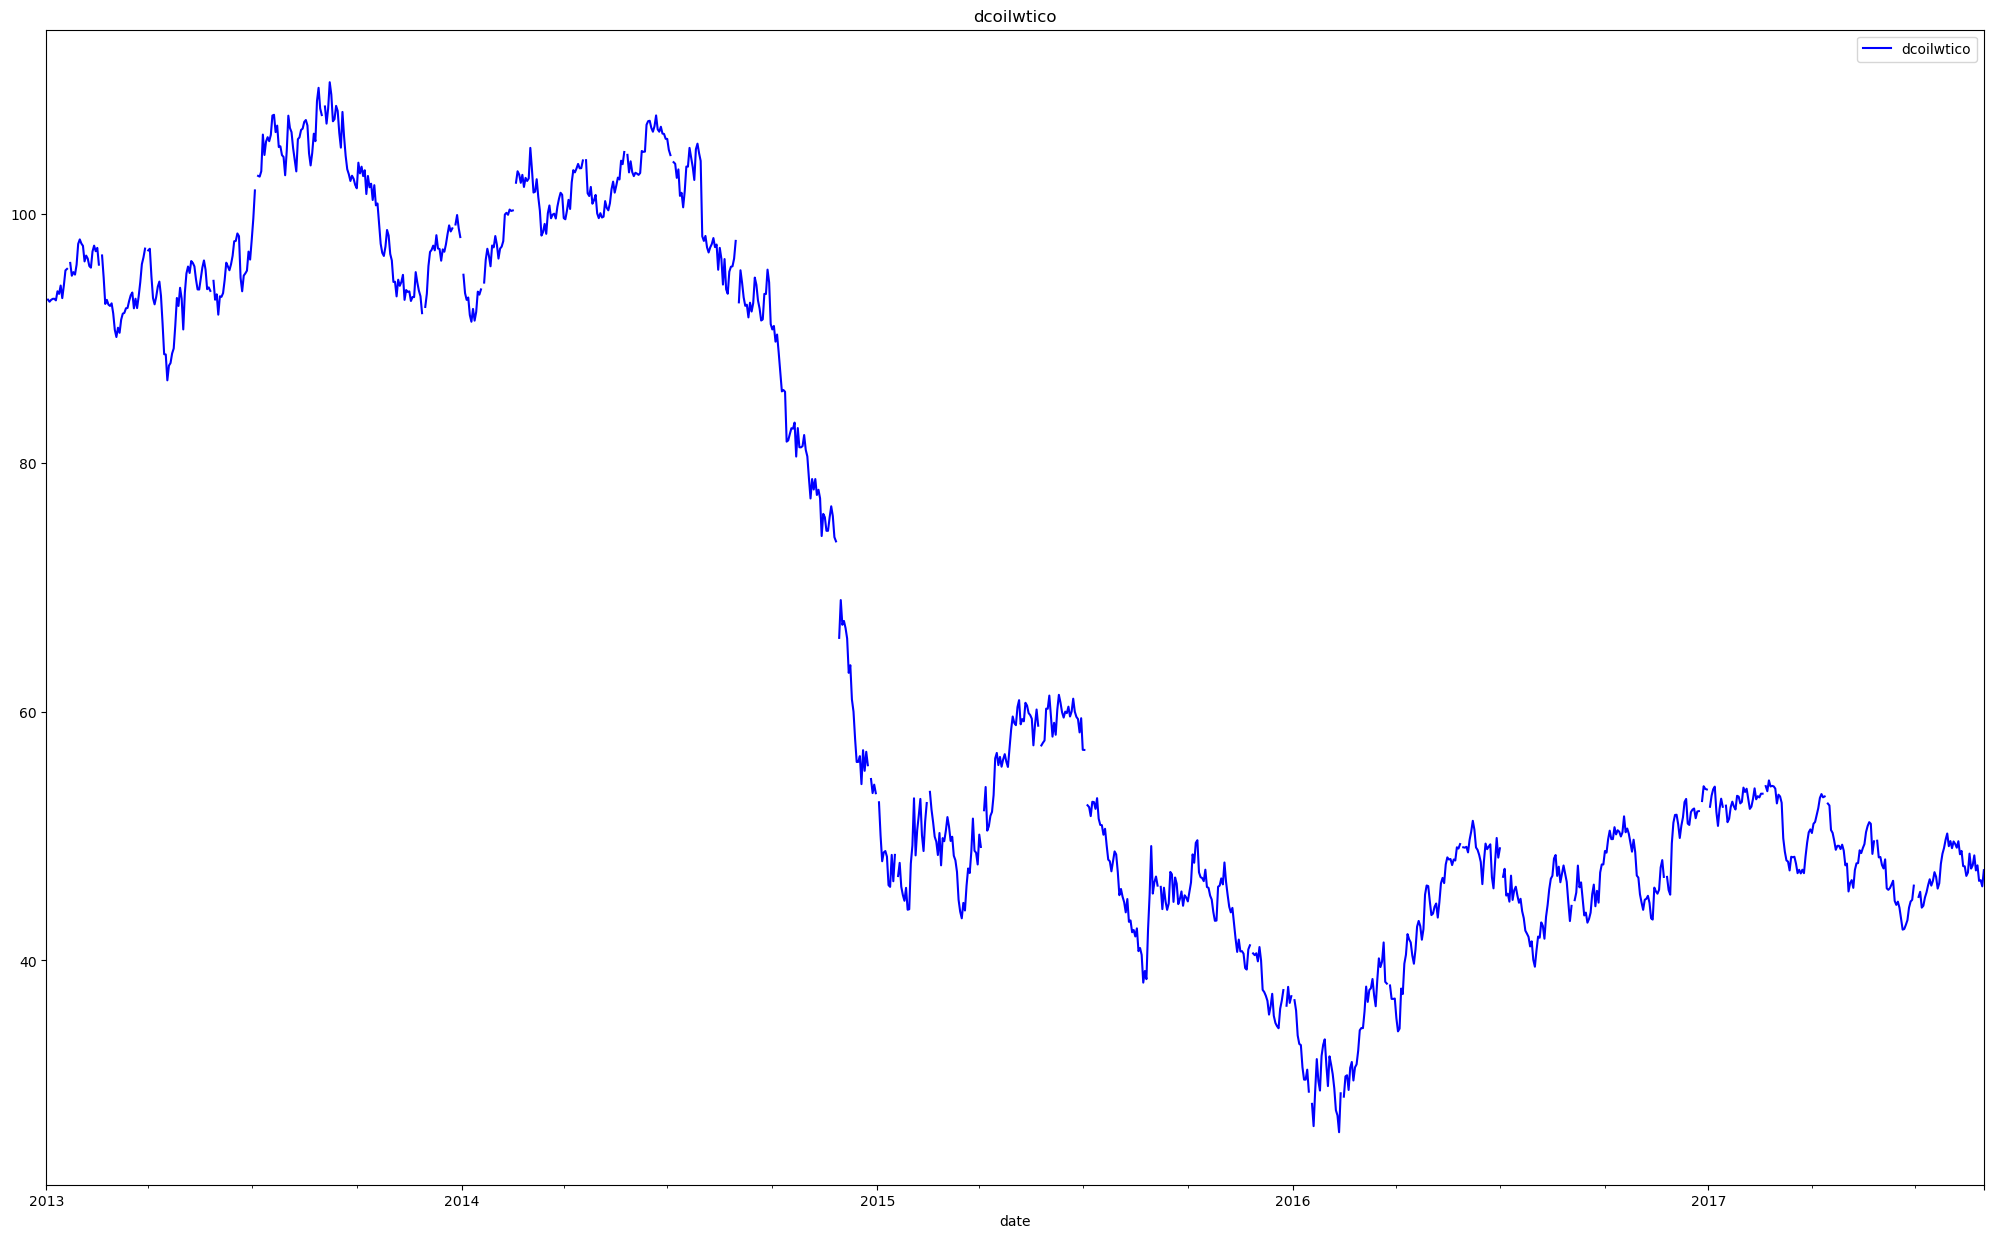

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25,15))
df_oil.plot.line(x='date', y='dcoilwtico', color='b', title='dcoilwtico', ax=axes, rot=0)
plt.show() 

As we have so much rows in our dataset, it will be easier to group data, as example, by week or month. The aggregation will be made by mean.

In [13]:
def grouped(df, key, freq, col):
    '''group data with certain frequency'''
    df_grouped = df.groupby([pd.Grouper(key=key, freq=freq)]).agg(mean=(col, 'mean'))
    df_grouped = df_grouped.reset_index()
    ## or
    # df_grouped = df.set_index(key).resample(freq)[col].mean().reset_index()
    return df_grouped


Here we can **check grouped data:**

In [14]:
df_grouped_trans_w = grouped(df_trans, 'date', 'W', 'transactions')
df_grouped_trans_w

,date,mean
0,2013-01-06,1883.203463
1,2013-01-13,1641.090062
2,2013-01-20,1639.024845
3,2013-01-27,1609.816770
4,2013-02-03,1685.263975
...,...,...
237,2017-07-23,1623.208995
238,2017-07-30,1619.653439
239,2017-08-06,1713.743386
240,2017-08-13,1599.156085


And, for better forcasting we'll add 'time' columns to our dataframe.

In [15]:
def add_time(df, key, freq, col):
    """ Add column 'time' to df """
    df_grouped = grouped(df, key, freq, col)
    df_grouped['time'] = np.arange(len(df_grouped.index))
    column_time = df_grouped.pop('time')
    df_grouped.insert(1, 'time', column_time)
    return df_grouped

So, now we can check the results of grouping on the example of **df_train** **(grouped by weeks on sales, after that, mean was counted)**

In [16]:
df_grouped_train_w = add_time(df_train, 'date', 'W', 'sales')
df_grouped_train_m = add_time(df_train, 'date', 'M', 'sales')
df_grouped_train_w.head()

,date,time,mean
0,2013-01-06,0,206.843478
1,2013-01-13,1,190.285220
2,2013-01-20,2,189.835452
3,2013-01-27,3,182.152050
4,2013-02-03,4,198.564267


### 3.1 Linear Regression
After that, we can built more plots. **Linear regression** is widely used in practice and adapts naturally to even complex forecasting tasks. The linear regression algorithm learns how to make a weighted sum from its input features.

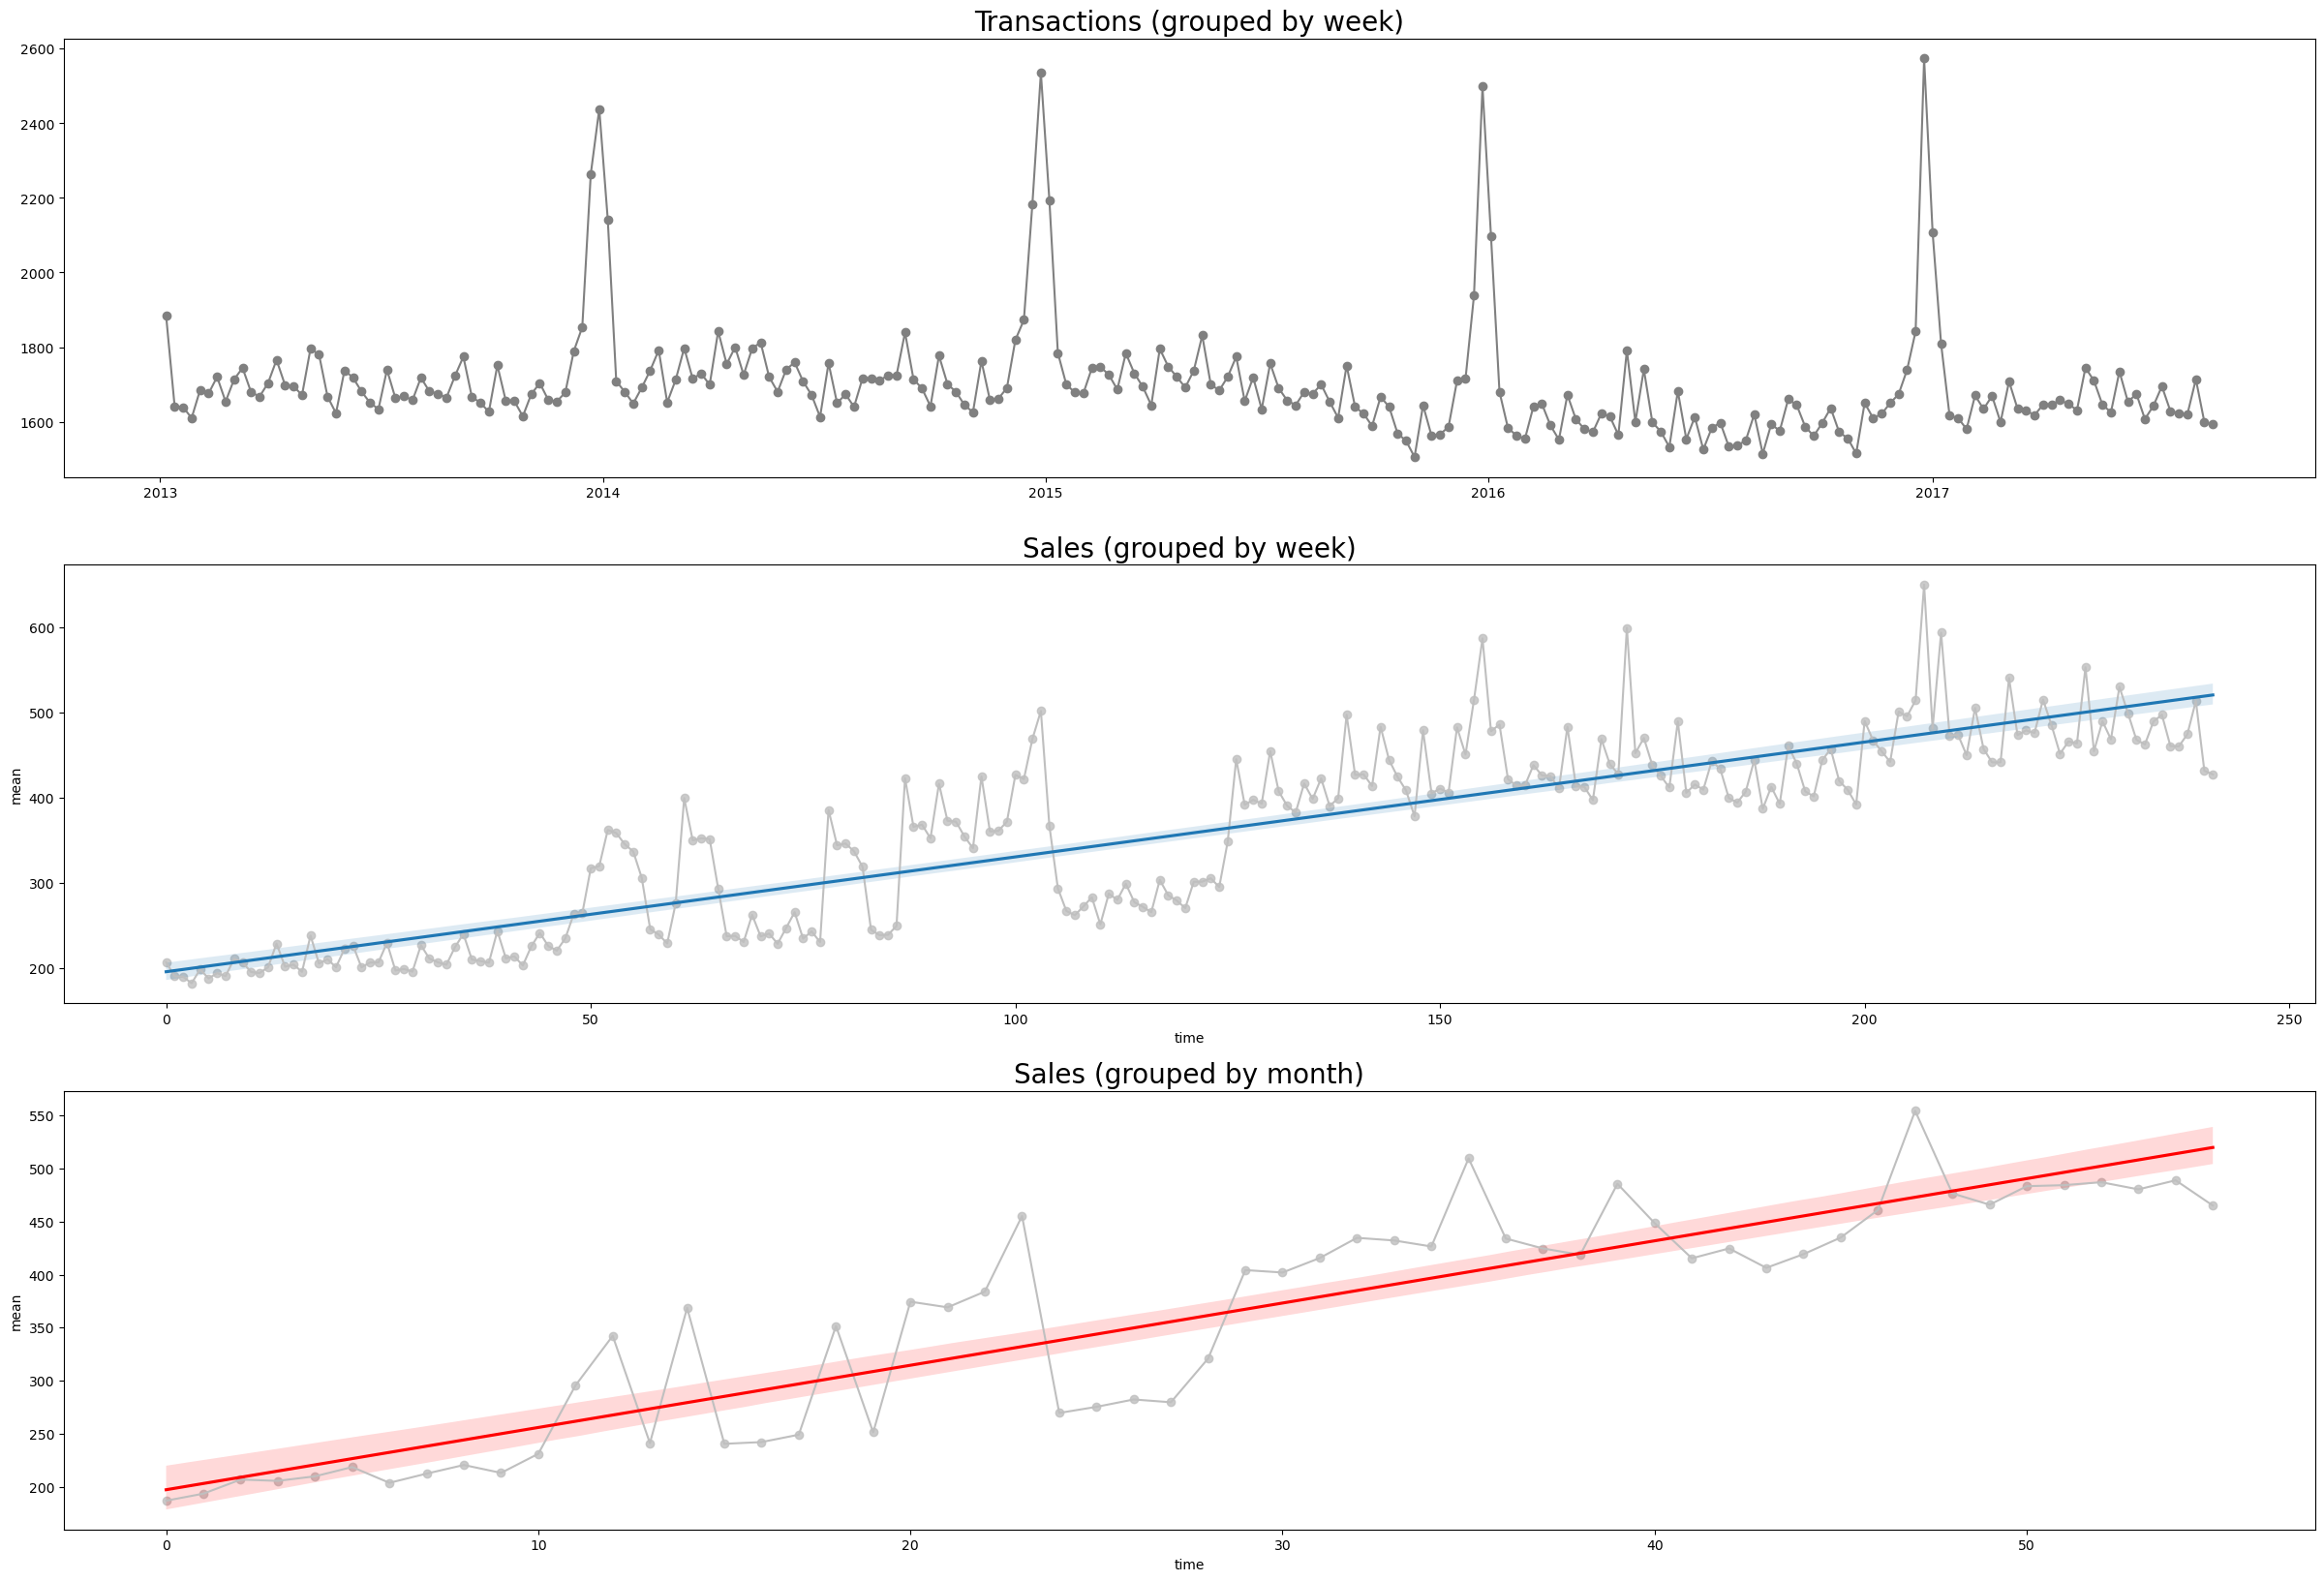

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30,20))

# TRANSACTIONS (WEEKLY)
axes[0].plot('date', 'mean', data=df_grouped_trans_w, color='grey', marker='o')
axes[0].set_title("Transactions (grouped by week)", fontsize=20)

# SALES(WEEKLY)
axes[1].plot('time', 'mean', data=df_grouped_train_w, color='0.75')
axes[1].set_title('Sales (grouped by week)', fontsize=20)
# linear regression
axes[1] = sns.regplot(x='time', y='mean',data=df_grouped_train_w, scatter_kws=dict(color='0.75'),ax=axes[1])

# SALES(MONTHLY)
axes[2].plot('time','mean',data=df_grouped_train_m, color='0.75')
axes[2].set_title('Sales (grouped by month)', fontsize=20)
# linear regression
axes[2] = sns.regplot(x='time',y='mean',data=df_grouped_train_m, scatter_kws=dict(color='0.75'),line_kws=dict(color='red'),ax=axes[2])
plt.show()

### 3.2 Lag feature
To make a lag feature we shift the observations of the target series so that they appear to have occured later in time. Here we've created a 1-step lag feature, though shifting by multiple steps is possible too. So, firstly, we should add lag to our data. 

In [18]:
def add_lag(df, key, freq, col, lag):
    """ ADD LAG """
    df_grouped = grouped(df, key, freq, col)
    name = 'lag' + str(lag)
    df_grouped['Lag'] = df_grouped['mean'].shift(lag)
    return df_grouped

Here we can **check grouped data with lag:**

In [19]:
df_grouped_train_w_lag1 = add_lag(df_train, 'date', 'W', 'sales', 1)
df_grouped_train_m_lag1 = add_lag(df_train, 'date', 'M', 'sales', 1)
df_grouped_train_w_lag1.head()

,date,mean,Lag
0,2013-01-06,206.843478,NaN
1,2013-01-13,190.285220,206.843478
2,2013-01-20,189.835452,190.285220
3,2013-01-27,182.152050,189.835452
4,2013-02-03,198.564267,182.152050


So lag features let us fit curves to lag plots where each observation in a series is plotted against the previous obsesrvation.

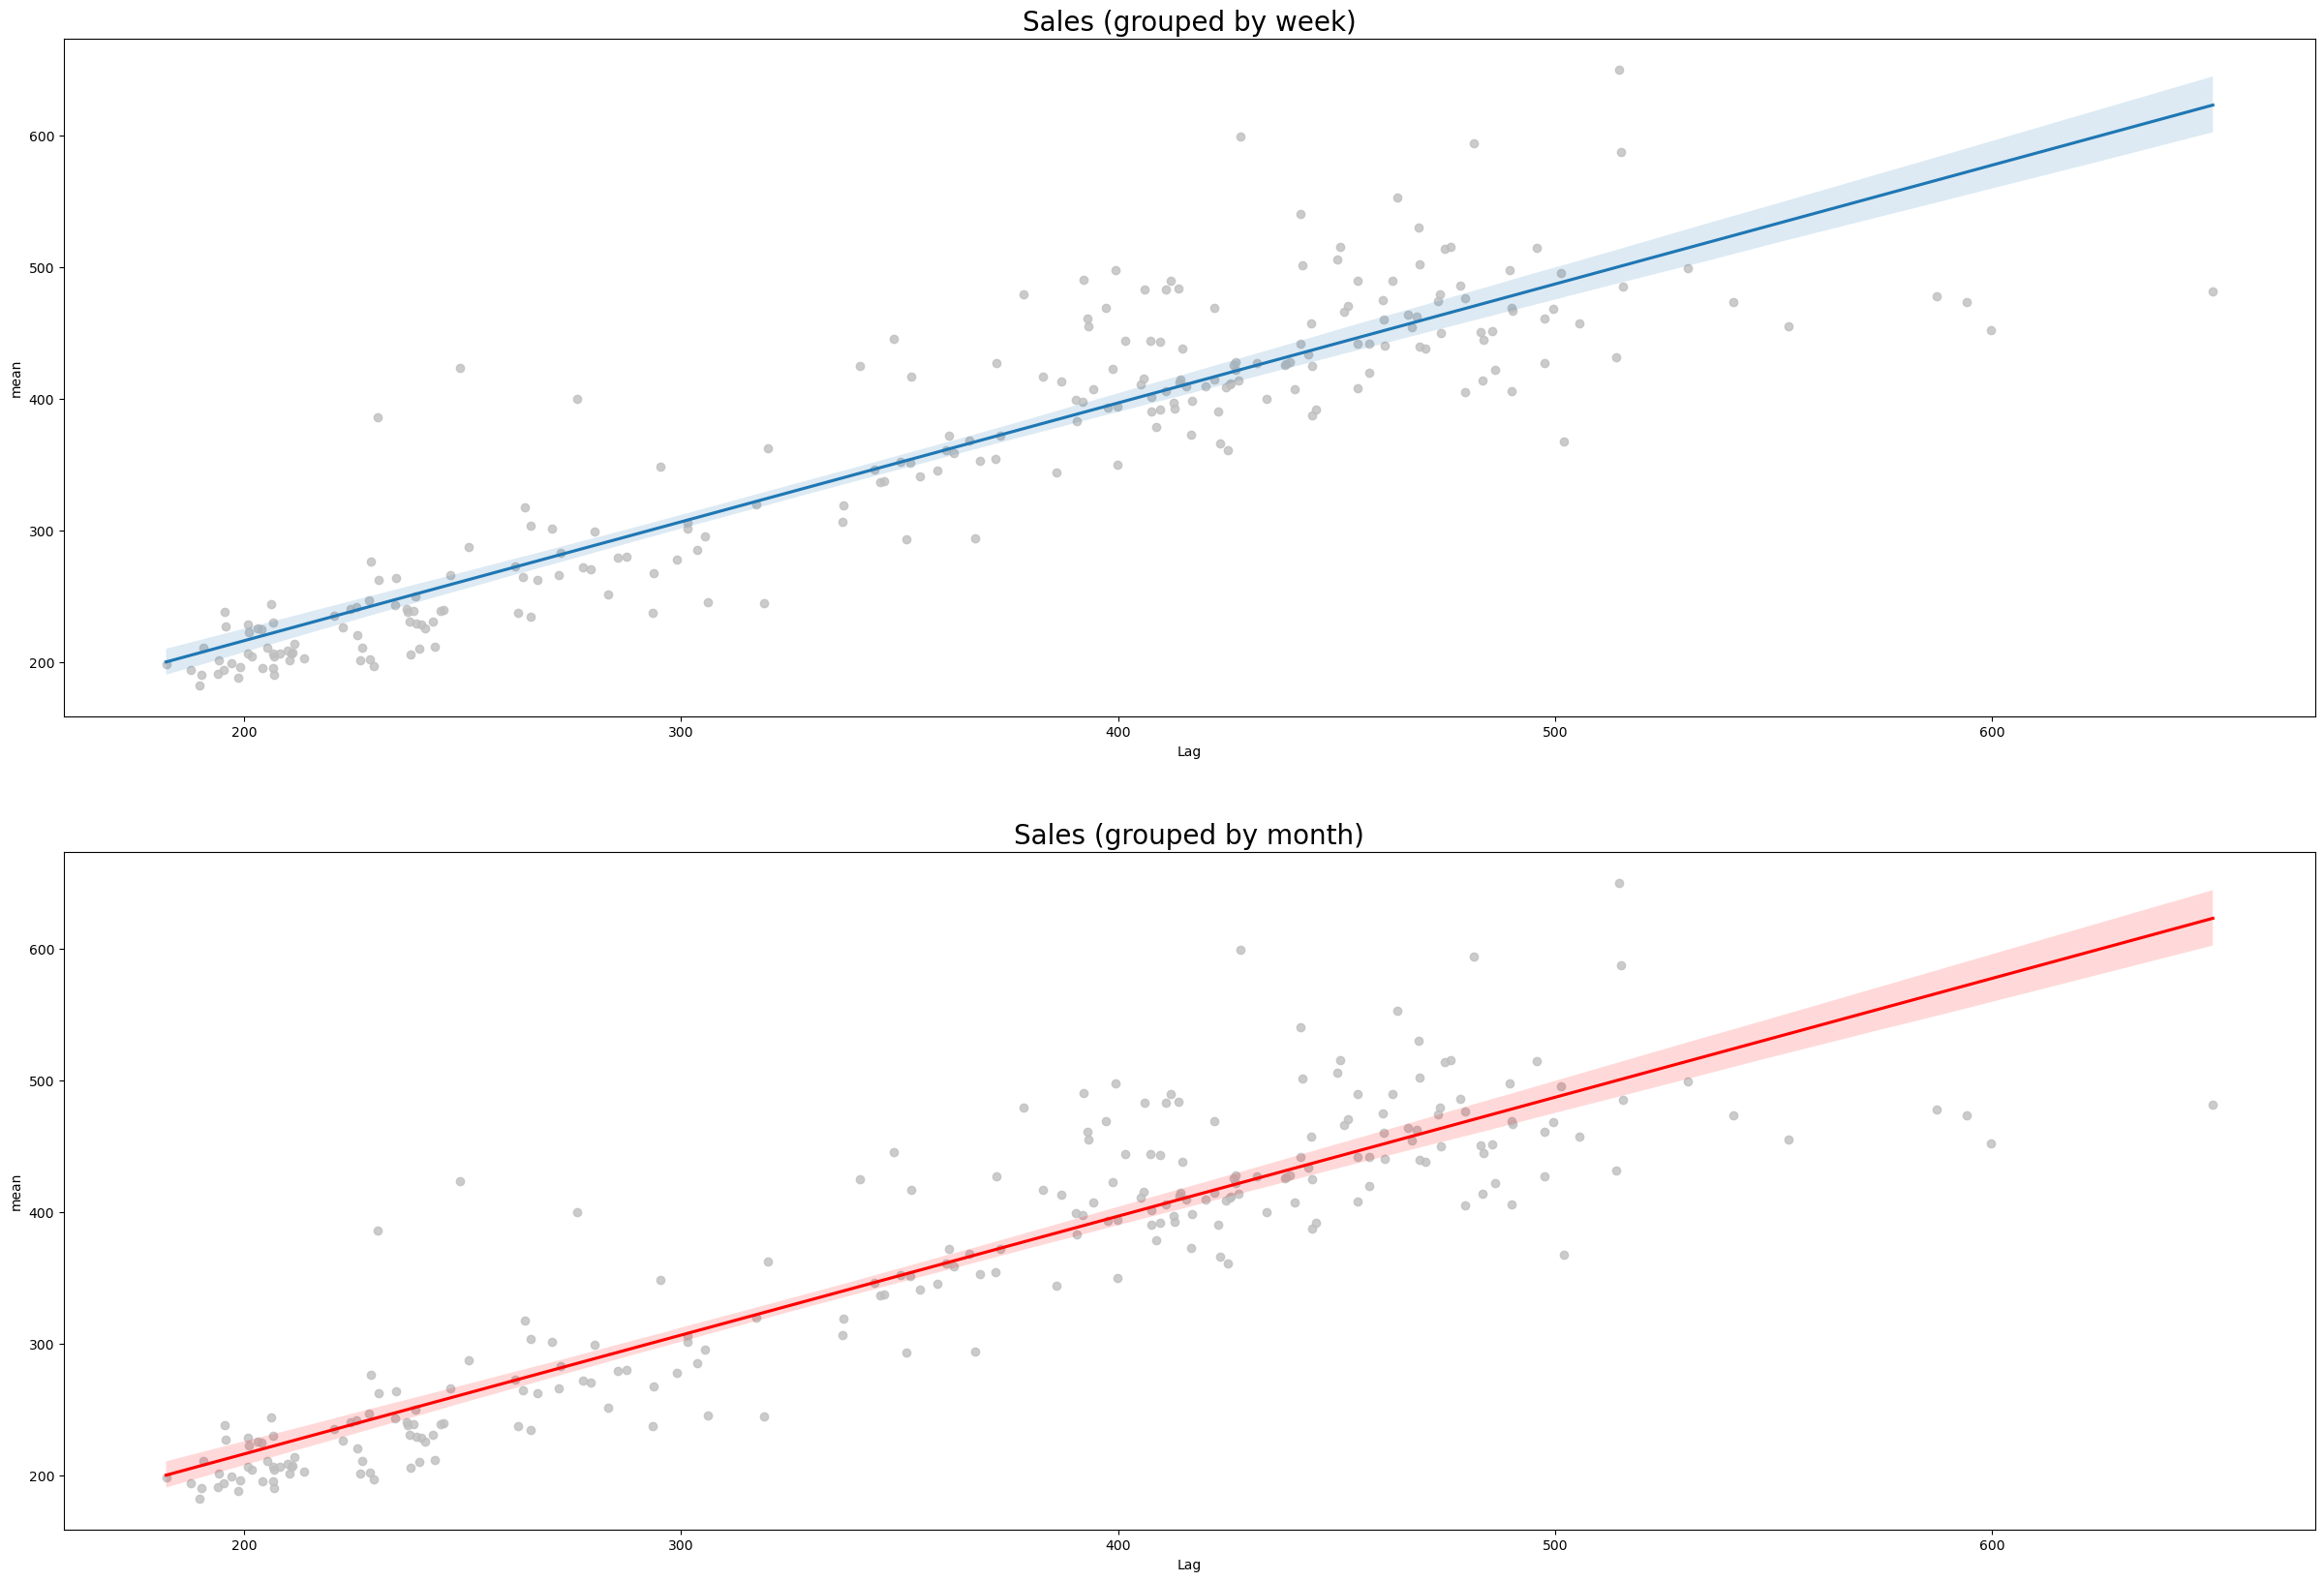

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(30, 20))
# axes[0].plot('Lag', 'mean', data=df_grouped_train_w_lag1, color='0.75', linestyle=(0, (0, 10)))
axes[0].set_title("Sales (grouped by week)", fontsize=20)
axes[0] = sns.regplot(x='Lag', y='mean', data=df_grouped_train_w_lag1, scatter_kws=dict(color='0.75'),ax=axes[0])

# axes[1].plot('Lag', 'mean', data=df_grouped_train_w_lag1,color='0.75', linestyle=(0, (1, 10)))
axes[1].set_title("Sales (grouped by month)", fontsize=20)
axes[1] = sns.regplot(x='Lag', y='mean', data=df_grouped_train_w_lag1,scatter_kws=dict(color='0.75'), line_kws={"color": "red"}, ax = axes[1])
plt.show()

### 3.3 Some more statistics & visualizations
In this block we are going to explore data. Firstly, let's count for each category in each dataset, **value_counts()**:


In [21]:
def plot_stats(df, column, ax, color, angle):
    """ PLOT STATS OF DIFFERENT COLUMNS"""
    count_classes = df[column].value_counts()
    ax = sns.barplot(x=count_classes.index, y=count_classes, ax=ax, palette=color)
    ax.set_title(column.upper(), fontsize=18)
    for tick in ax.get_xticklabels():
        tick.set_rotation(angle)

Here we can see stats for **df_holidats**:

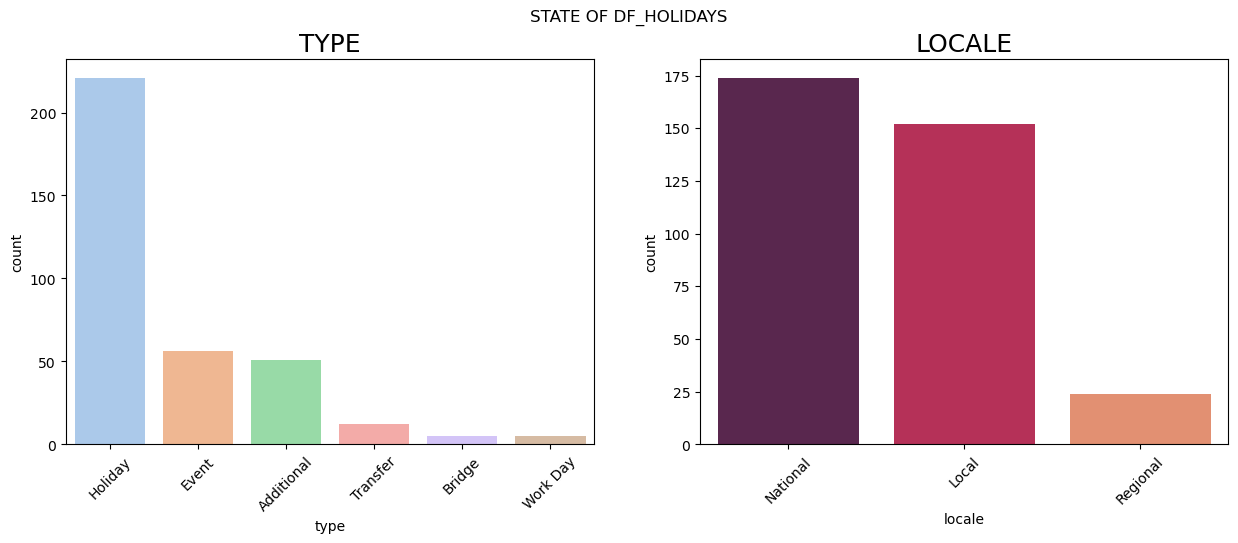

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# fig.autofmt_xdate()
fig.suptitle("State of df_holidays".upper())
plot_stats(df_holidays, "type", axes[0], "pastel", 45)
plot_stats(df_holidays, "locale", axes[1], "rocket", 45)
plt.show()

Here we count values for some columns of **df_stores**:


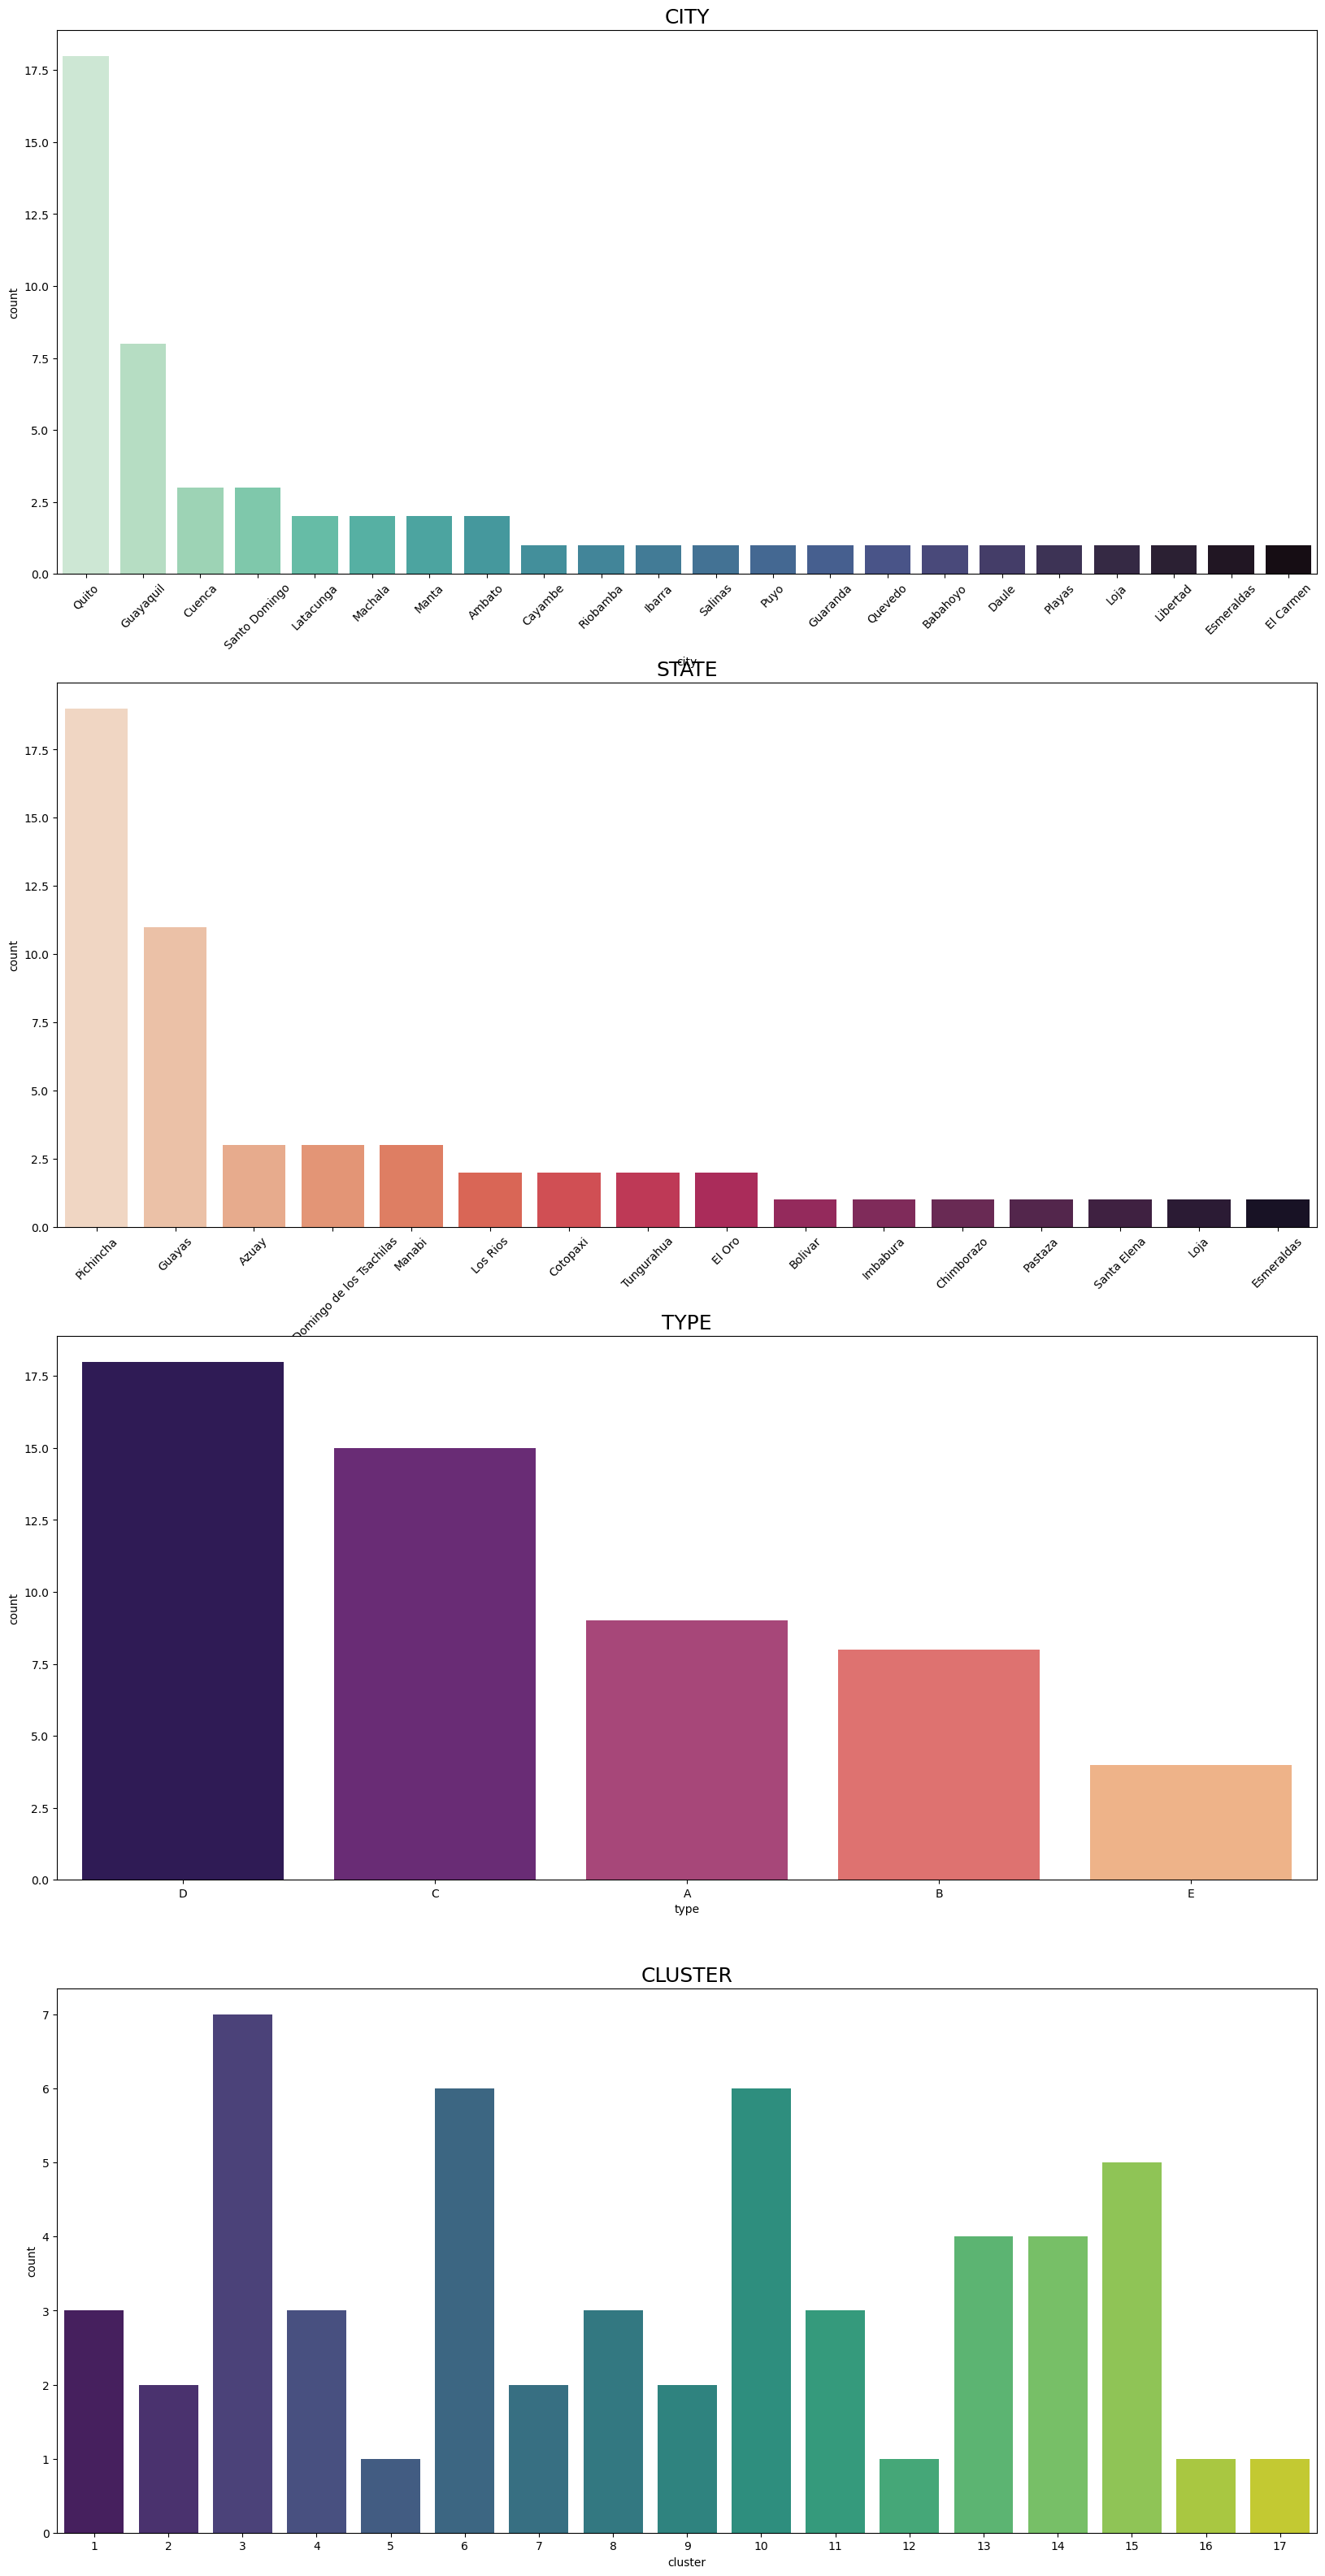

In [23]:
fig, axes = plt.subplots(4, 1, figsize=(20, 40))
plot_stats(df_stores, "city", axes[0], "mako_r", 45)
plot_stats(df_stores, "state", axes[1], "rocket_r", 45)
plot_stats(df_stores, "type", axes[2], "magma", 0)
plot_stats(df_stores, "cluster", axes[3], "viridis", 0)
plt.show()



Let's plot pie chart for 'family' of df_train:




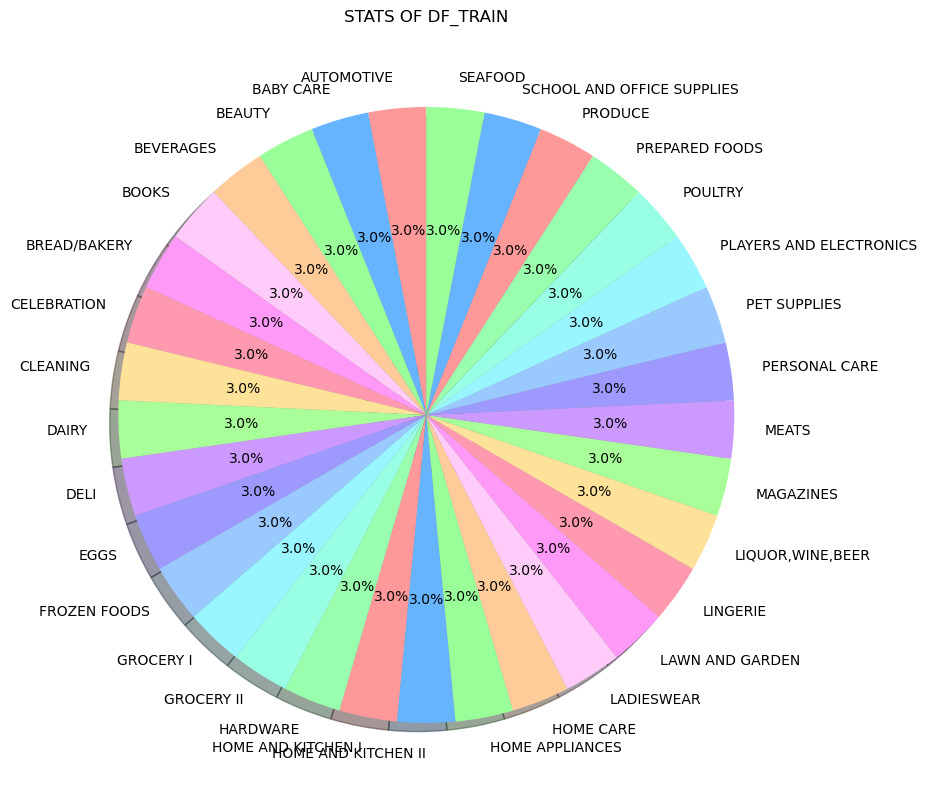

In [25]:
fig, axes = plt.subplots(1, 1, figsize=(20, 10))
count_classes = df_train['family'].value_counts()
plt.title("Stats of df_train".upper())
colors = ['#ff9999','#66b3ff','#99ff99',
          '#ffcc99', '#ffccf9', '#ff99f8', 
          '#ff99af', '#ffe299', '#a8ff99',
          '#cc99ff', '#9e99ff', '#99c9ff',
          '#99f5ff', '#99ffe4', '#99ffaf']

plt.pie(count_classes,
    labels = count_classes.index,
    autopct = '%1.1f%%',
    shadow = True,
    startangle = 90, 
    colors=colors)

plt.show()


### 3.4 BoxPlot
In addition, we can build some **boxplots**: for **df_oil** & **df_trans**.

In [27]:
def plot_boxplot(palette, x, y, hue, ax, title):
    sns.set_theme(style='ticks', palette=palette)
    ax = sns.boxplot(x=x, y=y, hue=hue, ax=ax)
    ax.set_title(title, fontsize=18)

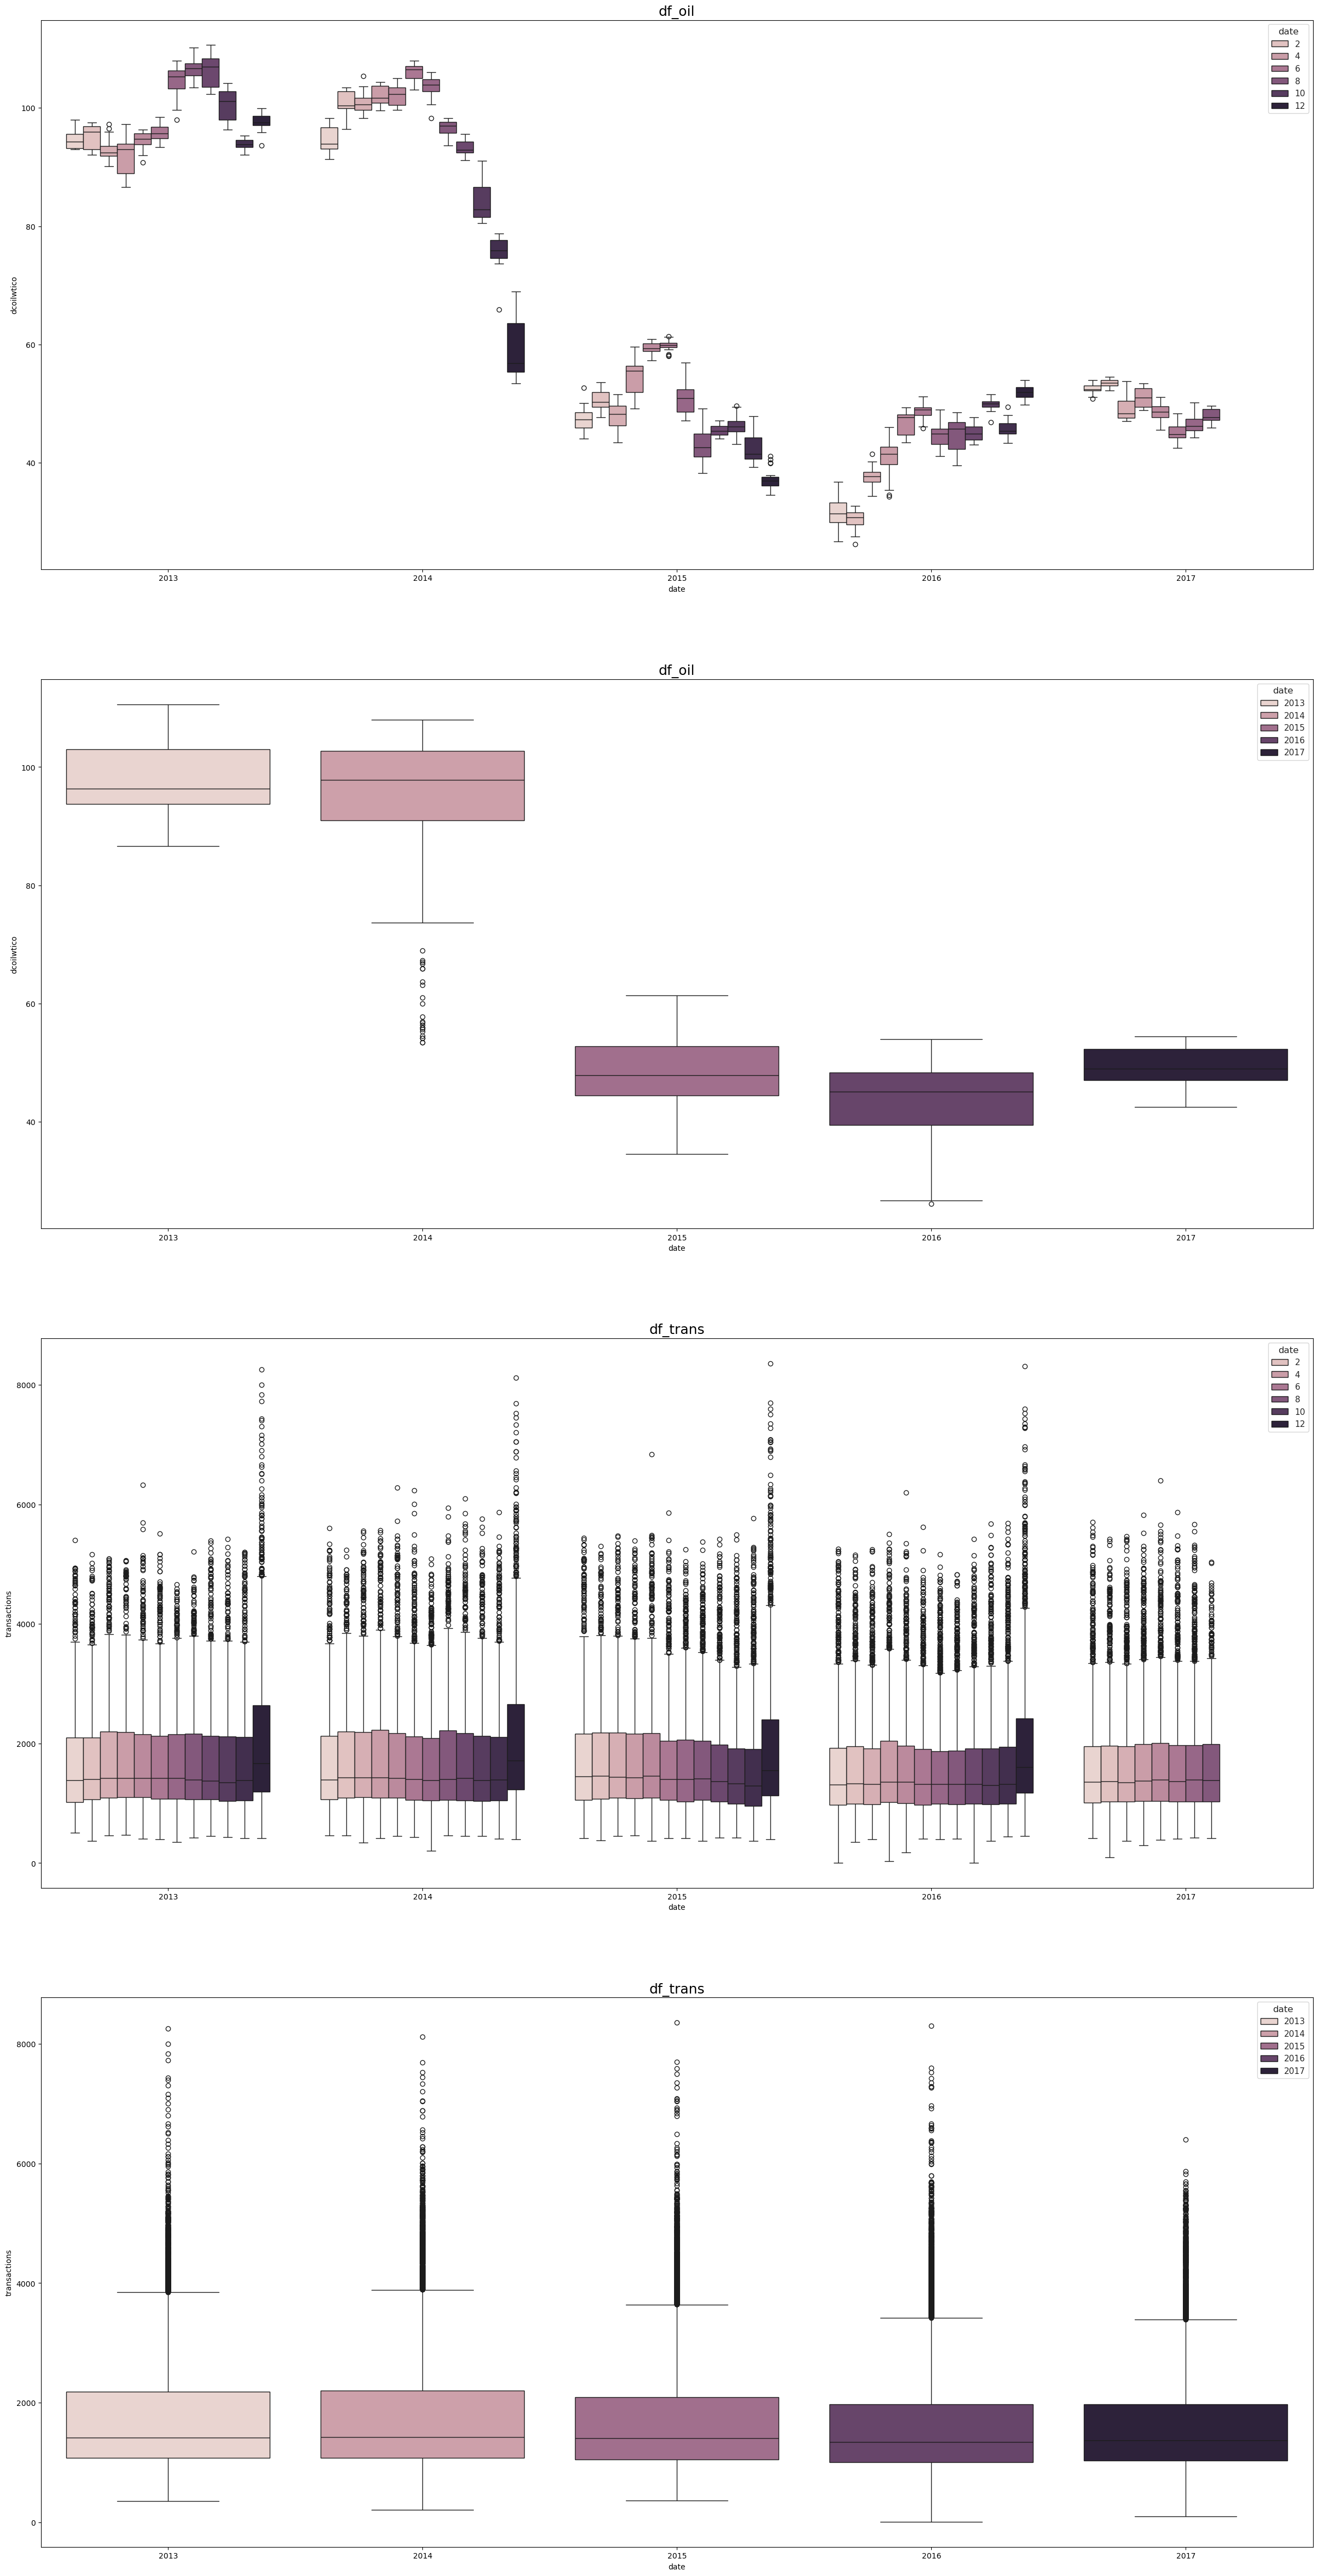

In [28]:
fig, axes = plt.subplots(4, 1, figsize=(30, 60))
plot_boxplot("pastel", df_oil['date'].dt.year, df_oil['dcoilwtico'], df_oil['date'].dt.month, axes[0], "df_oil")
plot_boxplot("pastel", df_oil['date'].dt.year, df_oil['dcoilwtico'], df_oil['date'].dt.year, axes[1], "df_oil")
plot_boxplot("pastel", df_trans['date'].dt.year, df_trans['transactions'], df_trans['date'].dt.month, axes[2], "df_trans")
plot_boxplot("pastel", df_trans['date'].dt.year, df_trans['transactions'], df_trans['date'].dt.year, axes[3], "df_trans")
plt.show()


### 3.5 Trend. Moving Average
The trend component of a time series represents a persistent, long-term change in the mean of the series. The trend is the slowest-moving part of a series, the part representing the largest time scale of importance. In a time series of product sales, an increasing trend might be the effect of a market expansion as more people become aware of the product year by year.

To see what kind of trend a time series might have, we can use a moving average plot. To compute a moving average of a time series, we compute the average of the values within a sliding window of some defined width. Each point on the graph represents the average of all the values in the series that fall within the window on either side. The idea is to smooth out any short-term fluctuations in the series so that only long-term changes remain.

Below we can see the moving average plots for **Transactions and Sales**, colored in green.

In [32]:
def plot_moving_average(df, key, freq, col, window, min_periods, ax, title):
    df_grouped = grouped(df, key, freq, col)
    moving_average = df_grouped['mean'].rolling(window=window, center=True, min_periods=min_periods).mean()
    ax = df_grouped['mean'].plot(color='0.75', linestyle='dashdot', ax=ax)
    ax = moving_average.plot(linewidth=3, color='g', ax=ax)
    ax.set_title(title, fontsize=18)

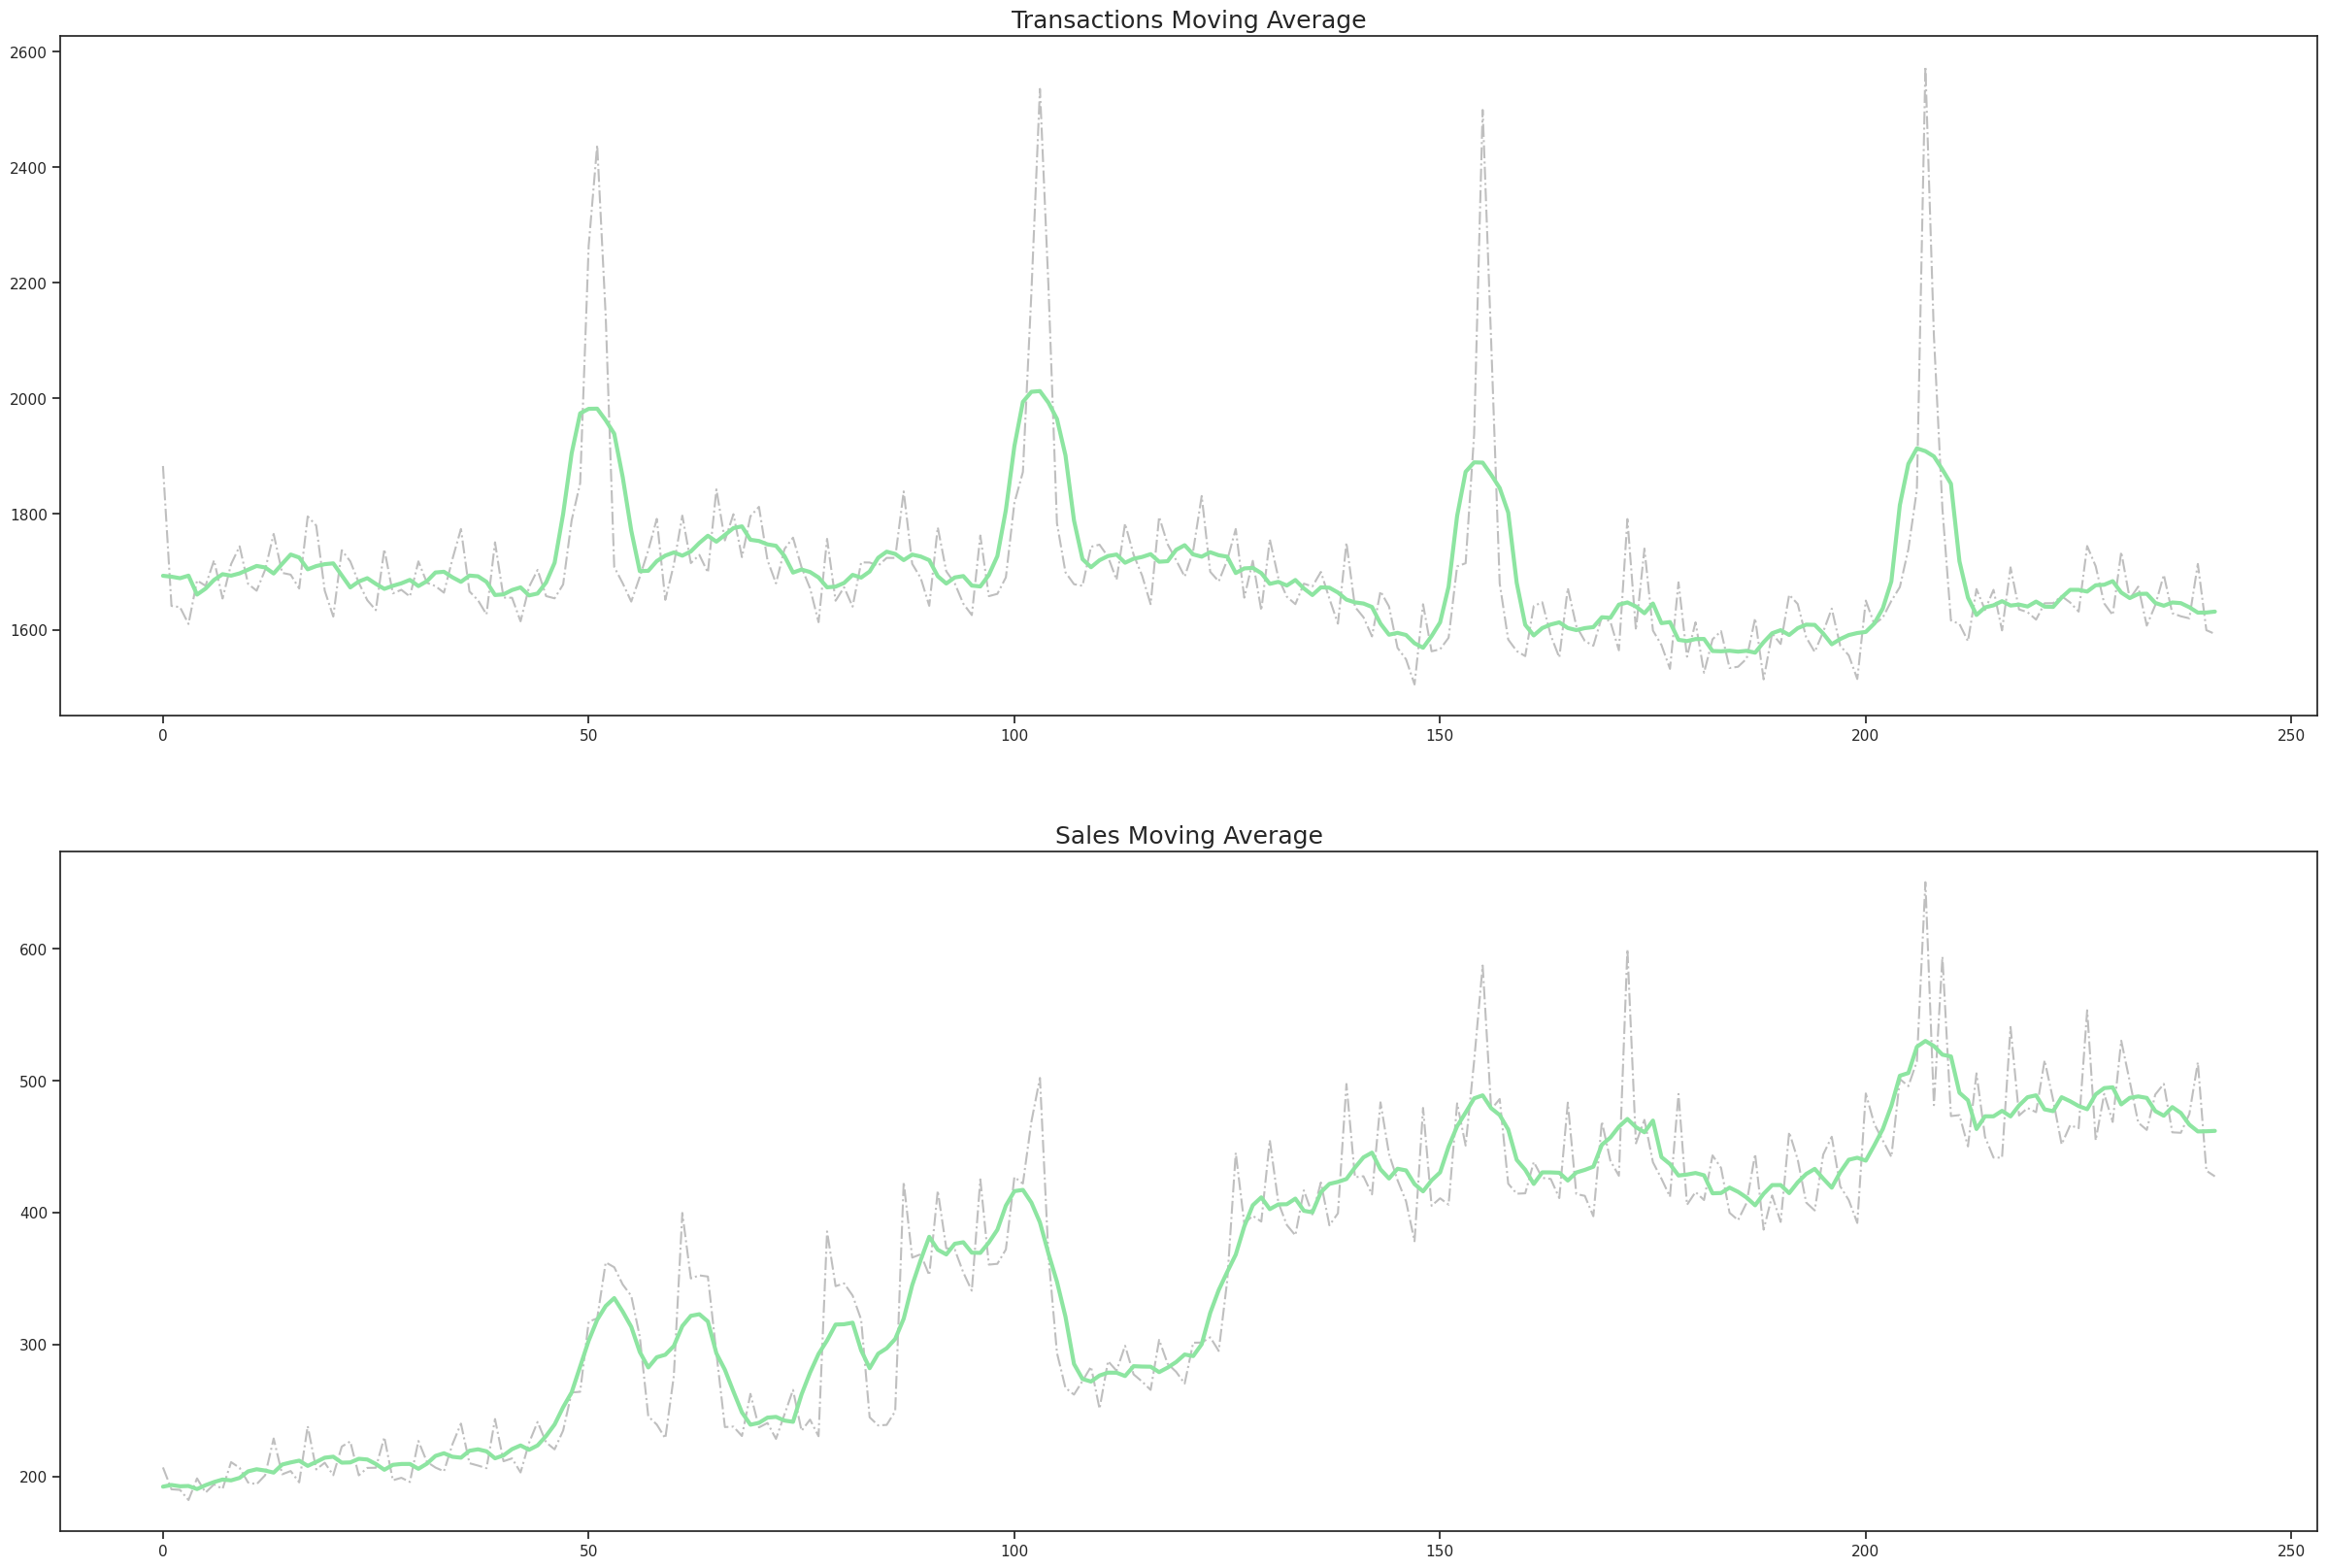

In [34]:
fig, axes = plt.subplots(2, 1, figsize=(30, 20))
plot_moving_average(df_trans, 'date', 'W', 'transactions', 7, 4, axes[0], 'Transactions Moving Average')
plot_moving_average(df_train, 'date', 'W', 'sales', 7, 4, axes[1], 'Sales Moving Average')
plt.show()

### 3.6 Trend.Forecasting Trend
We'll use a function from the statsmodels library called DeterministicProcess. Using this function will help us avoid some tricky failure cases that can arise with time series and linear regression. The order argument refers to polynomial order: 1 for linear, 2 for quadratic, 3 for cubic, and so on.

In [ ]:
def plot_deterministic_process(df, key, freq, col, ax1, title1, ax2, title2):
    df_grouped = grouped(df, key, freq, col)
    df_grouped.date = pd.to_datetime(df_grouped['date'], format = "%Y-%m-%d")
    dp = DeterministicProcess(index=df_grouped['date'], constant=True, order=1, drop=True)
    dp.index.freq = freq

    